In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [2]:
train_path = os.path.join('data','train.csv')
test_path = os.path.join('data','test.csv')

In [15]:
test_df = pd.read_csv(test_path)

In [3]:
train_df = pd.read_csv(train_path)

In [4]:
y_train = train_df['label']
X_train = train_df.drop('label',axis=1)

In [5]:
def show_pic(row_num:int):
    some_digit = X_train.loc[row_num]
    some_digit_image = some_digit.values.reshape(28, 28)
    plt.imshow(some_digit_image, cmap="binary")
    plt.axis("off")
    plt.show()

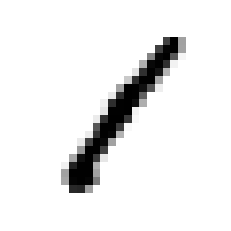

In [6]:
show_pic(0)

In [7]:
y_train[0]

1

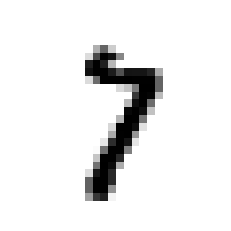

In [8]:
show_pic(1003)

In [9]:
y_train[1003]

7

In [18]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [10]:
from sklearn.model_selection import cross_val_score

In [25]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.87235714, 0.88628571, 0.86264286])

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 42)
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


KeyboardInterrupt: 

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42,n_estimators = 600,max_depth = 15,min_samples_split=5,min_samples_leaf=3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [28]:
cross_val_score(forest,X_train,y_train,cv=3,scoring="accuracy")

array([0.95614286, 0.95764286, 0.962     ])

In [14]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=300, random_state=42)

In [17]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_test = forest.predict(test_df)

In [19]:
y_test

array([2, 0, 9, ..., 3, 9, 2])

In [25]:
def get_result(file_name:str,y_test_df):
    result = pd.DataFrame()
    result['ImageId'] = test_df.index
    result['Label'] = y_test_df
    result.set_index('ImageId',inplace=True)
    result.index+=1
    result.to_csv(file_name+'.csv')

In [26]:
get_result('result',y_test)

In [24]:
len(y_test)

28000